In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import HeatMap
from pandas.conftest import ordered
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as XGBRegressor
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'hypothesis'

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
sns.set(style="whitegrid")

In [11]:
try:
    df = pd.read_csv('data/data2.csv')
    print(f"Данные успешно загружены. Размер датасета: {df.shape}")
except FileNotFoundError:
    print("Файл не найден. Создаем примерный датасет на основе представленных примеров...")
    
    data = {
        'DR_NO': [190326475, 200106753, 200320258],
        'Date Rptd': ['03/01/2020 12:00:00 AM', '02/09/2020 12:00:00 AM', '11/11/2020 12:00:00 AM'],
        'DATE OCC': ['03/01/2020 12:00:00 AM', '02/08/2020 12:00:00 AM', '11/04/2020 12:00:00 AM'],
        'TIME OCC': [2130.0, 1800.0, 1700.0],
        'AREA': [7.0, 1.0, 3.0],
        'AREA NAME': ['Wilshire', 'Central', 'Southwest'],
        'Rpt Dist No': [784.0, 182.0, 356.0],
        'Part 1-2': [1.0, 1.0, 1.0],
        'Crm Cd': [510.0, 330.0, 480.0],
        'Crm Cd Desc': ['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN'],
        'Mocodes': ['1822 1402 0344', '0344 1251', '0325 1501'],
        'Vict Age': [0.0, 47.0, 19.0],
        'Vict Sex': ['M', 'M', 'X'],
        'Vict Descent': ['O', 'O', 'X'],
        'Premis Cd': [101.0, 128.0, 502.0],
        'Premis Desc': ['STREET', 'BUS STOP/LAYOVER (ALSO QUERY 124)', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'],
        'Weapon Used Cd': [400.0, 400.0, 400.0],
        'Weapon Desc': ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'],
        'Status': ['AA', 'IC', 'IC'],
        'Status Desc': ['Adult Arrest', 'Invest Cont', 'Invest Cont'],
        'Crm Cd 1': [510.0, 330.0, 480.0],
        'Crm Cd 2': [998.0, 998.0, 821.0],
        'Crm Cd 3': [815.0, 998.0, 930.0],
        'Crm Cd 4': [998.0, 998.0, 998.0],
        'LOCATION': ['1900 S  LONGWOOD                     AV', '1000 S  FLOWER                       ST', '1400 W  37TH                         ST'],
        'Cross Street': ['VANOWEN                      AV', 'INGLEWOOD', 'GLADYS                       AV'],
        'LAT': [34.0375, 34.0444, 34.021],
        'LON': [-118.3506, -118.2628, -118.3002]
    }
    
    expanded_data = {}
    for key, values in data.items():
        expanded_values = []
        for _ in range(333):
            expanded_values.extend(values)
        expanded_values = expanded_values[:1000] 
        expanded_data[key] = expanded_values
    
    df = pd.DataFrame(expanded_data)
    print(f"Создан тестовый датасет. Размер: {df.shape}")


Данные успешно загружены. Размер датасета: (698672, 28)


In [12]:
print("\nПервые 5 строк датасета:")
df.head()


Первые 5 строк датасета:


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130.0,7.0,Wilshire,784.0,1.0,510.0,VEHICLE - STOLEN,NaN,0.0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800.0,1.0,Central,182.0,1.0,330.0,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700.0,3.0,Southwest,356.0,1.0,480.0,BIKE - STOLEN,0344 1251,19.0,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037.0,9.0,Van Nuys,964.0,1.0,343.0,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200.0,6.0,Hollywood,666.0,2.0,354.0,THEFT OF IDENTITY,1822 1501 0930 2004,28.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [13]:
print("\nПроверка наличия пропущенных значений:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Проверка наличия пропущенных значений:
Date Rptd            4
DATE OCC             4
TIME OCC             5
AREA                 5
AREA NAME            5
                 ...  
Crm Cd 4        698623
LOCATION             5
Cross Street    585377
LAT                  5
LON                  5
Length: 27, dtype: int64


In [14]:
def convert_time(time_value):
    if pd.isna(time_value):
        return np.nan, np.nan
    
    time_str = str(int(time_value)).zfill(4)
    hours = int(time_str[:2]) if len(time_str) >= 2 else 0
    minutes = int(time_str[2:]) if len(time_str) > 2 else 0
    return hours, minutes

In [15]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


In [16]:
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Day'] = df['DATE OCC'].dt.day
df['Weekday'] = df['DATE OCC'].dt.dayofweek
df['IsWeekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [19]:
df[['Hour', 'Minute']] = pd.DataFrame(df['TIME OCC'].apply(convert_time).tolist(), index=df.index)
df['TimeOfDay'] = pd.cut(df['Hour'], 
                         bins=[-1, 5, 11, 16, 21, 24], 
                         labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'],
                         ordered=False)

In [20]:
categorical_columns = ['AREA NAME', 'Vict Sex', 'Vict Descent', 'Status', 'TimeOfDay', 'Crm Cd Desc', 'Premis Desc', 'Weapon Desc']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [21]:
df['Days_To_Report'] = (df['Date Rptd'] - df['DATE OCC']).dt.days

In [22]:
print("\nПервые строки обработанных данных:")
df[['DR_NO', 'DATE OCC', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'TimeOfDay', 'IsWeekend', 'Days_To_Report']].head()



Первые строки обработанных данных:


,DR_NO,DATE OCC,Year,Month,Day,Hour,Minute,TimeOfDay,IsWeekend,Days_To_Report
0,190326475,2020-03-01,2020.0,3.0,1.0,21.0,30.0,Evening,1,0.0
1,200106753,2020-02-08,2020.0,2.0,8.0,18.0,0.0,Evening,1,1.0
2,200320258,2020-11-04,2020.0,11.0,4.0,17.0,0.0,Evening,0,7.0
3,200907217,2020-03-10,2020.0,3.0,10.0,20.0,37.0,Evening,0,1156.0
4,220614831,2020-08-17,2020.0,8.0,17.0,12.0,0.0,Afternoon,0,731.0


In [23]:
print("\nОбщая статистика по числовым признакам:")
numeric_stats = df.select_dtypes(include=['int64', 'float64']).describe()
numeric_stats



Общая статистика по числовым признакам:


,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,Year,Month,Day,Weekday,IsWeekend,Hour,Minute,Days_To_Report
count,698667.000000,698667.000000,698667.000000,698667.000000,698667.000000,698667.000000,698658.000000,242948.000000,698659.000000,52153.000000,1769.000000,49.000000,698667.000000,698667.000000,698667.000000,698667.000000,698667.000000,698667.000000,698672.000000,698667.000000,698667.000000,698667.000000
mean,1334.472825,10.722788,1118.660461,1.416985,501.246567,29.949511,305.420253,362.564001,500.985708,956.119418,983.819107,990.163265,33.963516,-117.971348,2021.205726,6.546349,15.356739,3.022005,0.285466,13.168913,17.581516,13.499548
std,654.221913,6.090015,608.995330,0.493061,208.124380,21.712702,216.573695,123.627487,207.914272,112.844359,52.004591,30.066833,1.937983,6.721274,0.943562,3.435902,8.967212,1.987882,0.451636,6.541695,18.095129,73.556908
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429700,2020.000000,4.000000,7.000000,1.000000,0.000000,9.000000,0.000000,0.000000
50%,1411.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321900,2021.000000,7.000000,15.000000,3.000000,0.000000,14.000000,15.000000,1.000000
75%,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163600,-118.273900,2022.000000,10.000000,23.000000,5.000000,1.000000,19.000000,30.000000,2.000000
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000,2023.000000,12.000000,31.000000,6.000000,1.000000,23.000000,59.000000,1591.000000


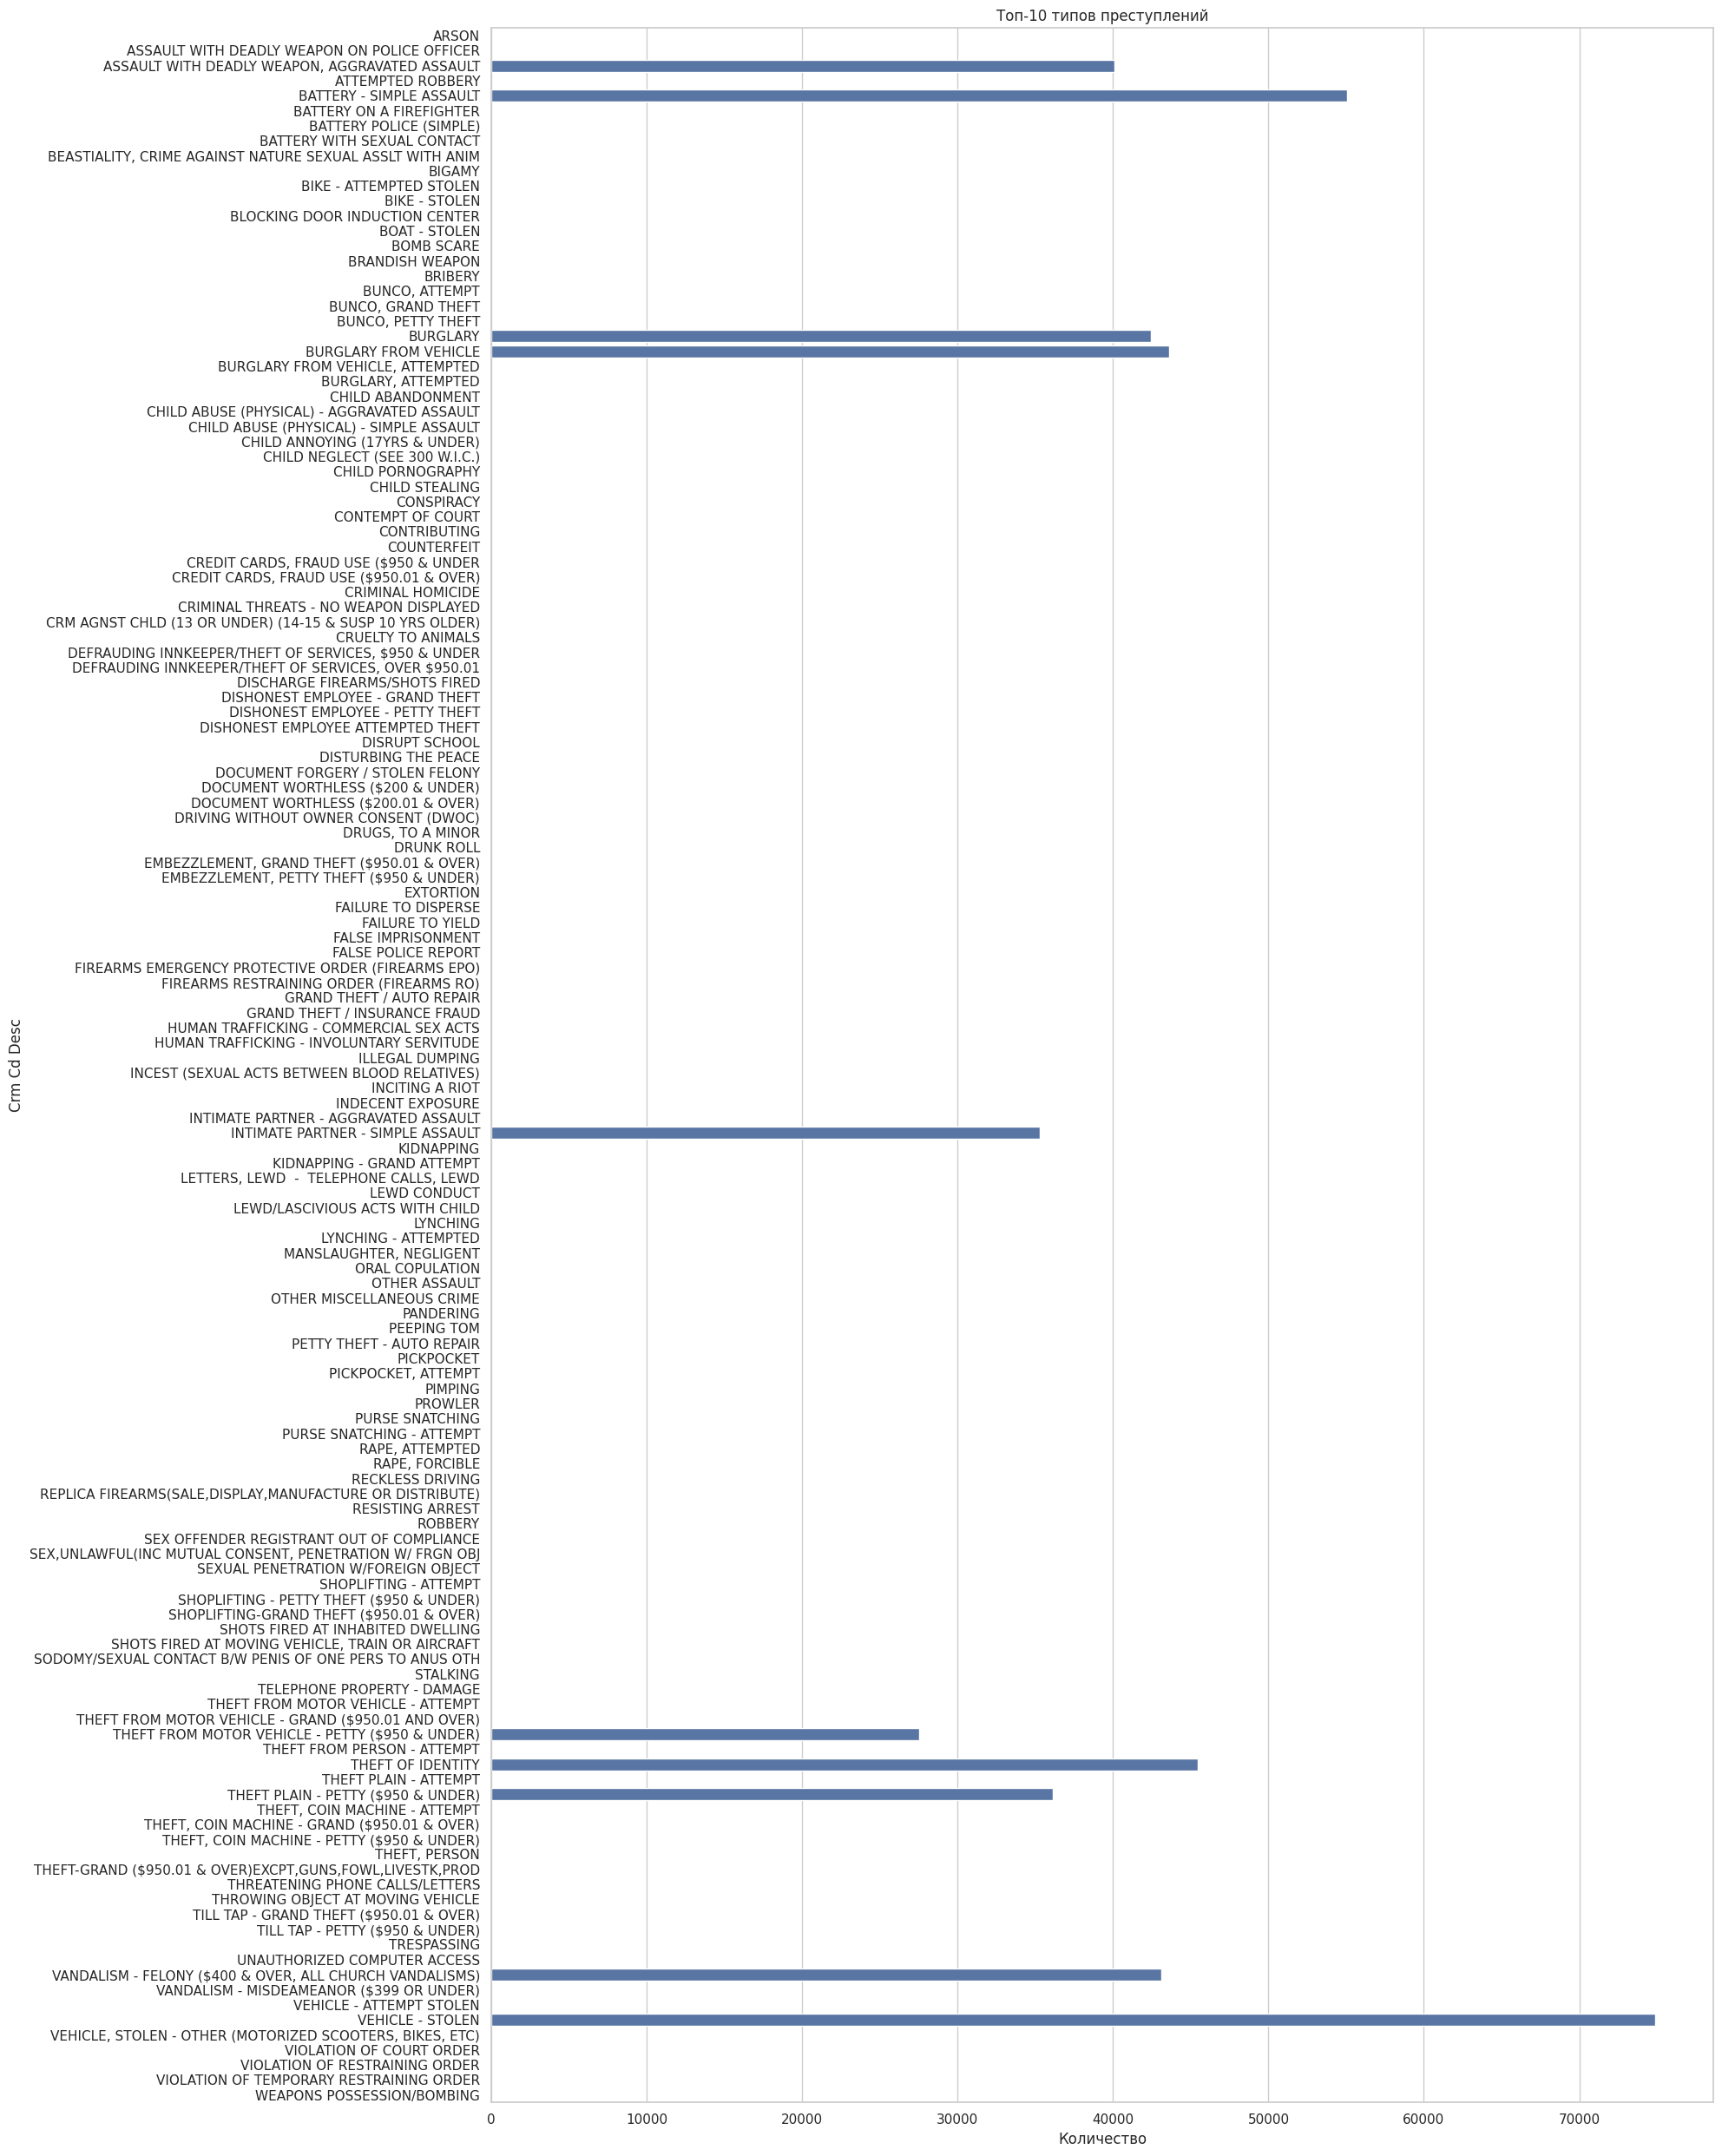

In [27]:
plt.figure(figsize=(20, 25))
crime_counts = df['Crm Cd Desc'].value_counts().head(10)
sns.barplot(x=crime_counts.values, y=crime_counts.index)
plt.title('Топ-10 типов преступлений')
plt.xlabel('Количество')
plt.tight_layout()
plt.show()

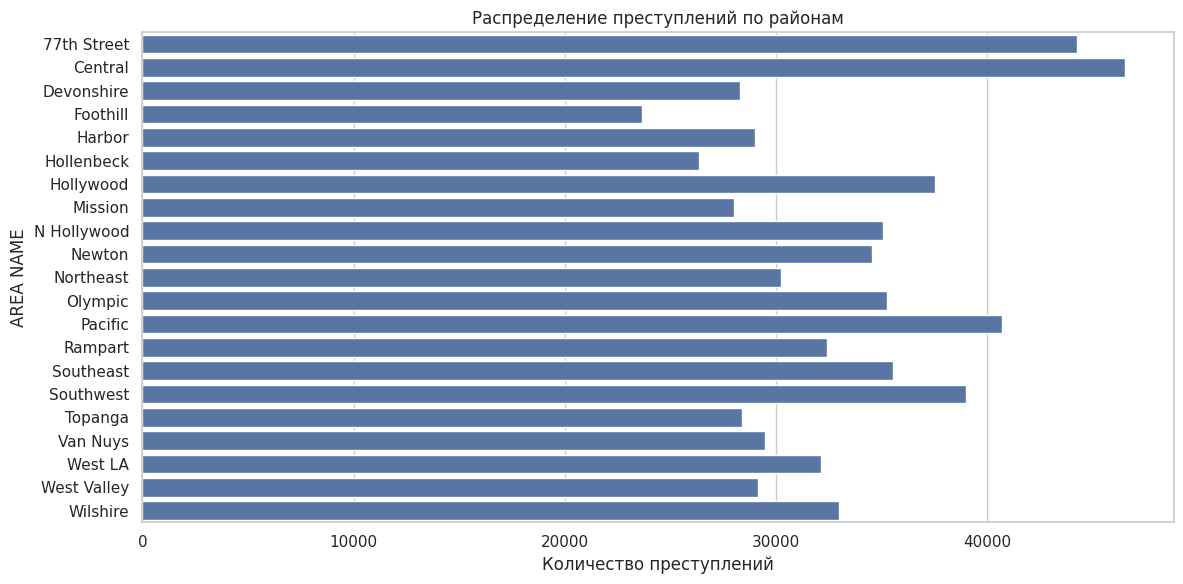

In [28]:
# Анализ распределения преступлений по районам
plt.figure(figsize=(12, 6))
area_counts = df['AREA NAME'].value_counts()
sns.barplot(x=area_counts.values, y=area_counts.index)
plt.title('Распределение преступлений по районам')
plt.xlabel('Количество преступлений')
plt.tight_layout()
plt.show()

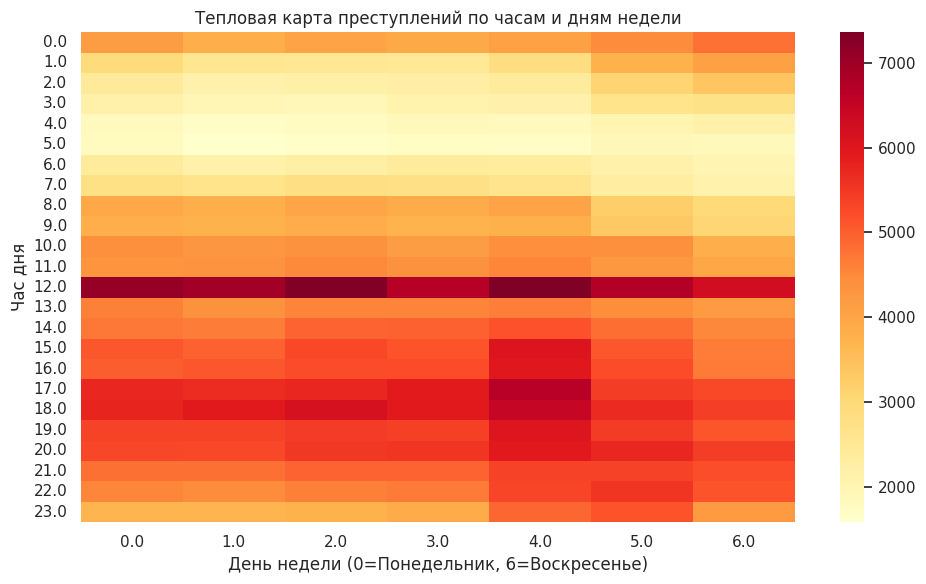

In [29]:
plt.figure(figsize=(10, 6))
hour_day_heatmap = pd.crosstab(df['Hour'], df['Weekday'])
sns.heatmap(hour_day_heatmap, cmap='YlOrRd')
plt.title('Тепловая карта преступлений по часам и дням недели')
plt.xlabel('День недели (0=Понедельник, 6=Воскресенье)')
plt.ylabel('Час дня')
plt.tight_layout()
plt.show()

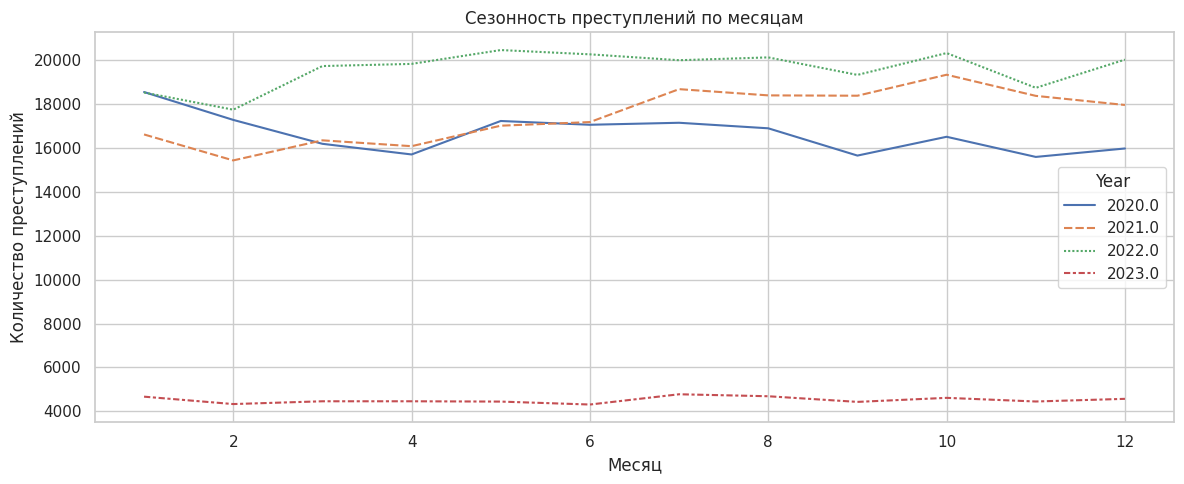

In [30]:
plt.figure(figsize=(12, 5))
month_counts = df.groupby(['Year', 'Month']).size().reset_index(name='count')
pivot_data = month_counts.pivot(index='Month', columns='Year', values='count')
sns.lineplot(data=pivot_data)
plt.title('Сезонность преступлений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество преступлений')
plt.tight_layout()
plt.show()

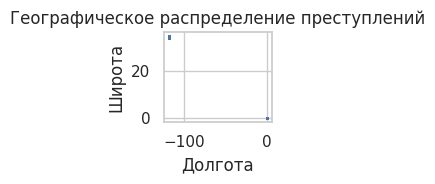

In [34]:
plt.figure(figsize=(2, 2))
plt.scatter(df['LON'], df['LAT'], alpha=0.5, s=1)
plt.title('Географическое распределение преступлений')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.tight_layout()
plt.show()

In [36]:
def create_crime_map(data, num_points=1000):
    sample_data = data.sample(min(num_points, len(data)))
    
    avg_lat = sample_data['LAT'].mean()
    avg_lon = sample_data['LON'].mean()
    crime_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=11)
    
    heat_data = [[row['LAT'], row['LON']] for _, row in sample_data.iterrows()]
    HeatMap(heat_data).add_to(crime_map)
    
    return crime_map

crime_map = create_crime_map(df)

In [37]:
crime_map.save('crime_heatmap.html')
print("\nТепловая карта преступлений сохранена в файл 'crime_heatmap.html'")


Тепловая карта преступлений сохранена в файл 'crime_heatmap.html'


In [38]:
crime_aggregated = df.groupby(['AREA NAME', 'Year', 'Month']).size().reset_index(name='crime_count')
print("\nАгрегированные данные по преступлениям:")
crime_aggregated.head()


Агрегированные данные по преступлениям:


,AREA NAME,Year,Month,crime_count
0,77th Street,2020.0,1.0,1304
1,77th Street,2020.0,2.0,1100
2,77th Street,2020.0,3.0,1012
3,77th Street,2020.0,4.0,1063
4,77th Street,2020.0,5.0,1074


In [39]:
crime_aggregated['date'] = pd.to_datetime(crime_aggregated[['Year', 'Month']].assign(day=1))

In [40]:
crime_trend = crime_aggregated.sort_values(['AREA NAME', 'date'])
crime_trend['prev_month_crimes'] = crime_trend.groupby('AREA NAME')['crime_count'].shift(1)
crime_trend['prev_2_months_avg'] = crime_trend.groupby('AREA NAME')['crime_count'].shift(1).rolling(window=2, min_periods=1).mean()
crime_trend['prev_3_months_avg'] = crime_trend.groupby('AREA NAME')['crime_count'].shift(1).rolling(window=3, min_periods=1).mean()


In [41]:
crime_trend['month_sin'] = np.sin(2 * np.pi * crime_trend['Month'] / 12)
crime_trend['month_cos'] = np.cos(2 * np.pi * crime_trend['Month'] / 12)

In [44]:
crime_trend = crime_trend.fillna(1)

TypeError: Cannot setitem on a Categorical with a new category (1), set the categories first